In [1]:
import numpy as np
import numpy.linalg as la
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

In [2]:
xData = np.array([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
yData = np.array([0.21, 0.49, 0.95, 0.73, 1.77, 2.58, 1.94, 2.84, 3.39, 3.36])

In [3]:
def plot_data_and_model(xData, yData, xModel, yModel):
    plt.plot(xModel, yModel, "-", c="C1", alpha=0.5)
    plt.plot(xData, yData, "o", c="C0", mew=0, alpha=0.5)
    plt.xticks(xData)
    plt.xlim(1969, 2016)
    plt.ylim(0, 4)
    plt.show()

V1 estimate: [-3.14725114e+19  1.42319510e+17 -2.86029803e+14  3.35329107e+11
 -2.52721396e+08  1.26974887e+05 -4.25303265e+01  9.15778392e-03
 -1.15025778e-06  6.42116402e-11]


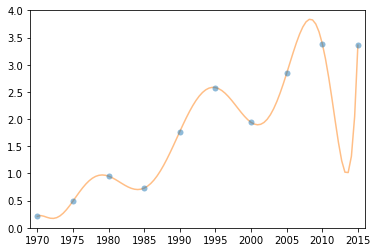

In [4]:
def polyFitV1(x, y, d):
    P = poly.Polynomial.fit(x, y, d)
    print ("V1 estimate:", P.convert().coef)
    return P.linspace()

degree = 9
xModel, yModel = polyFitV1(xData, yData, degree)
plot_data_and_model(xData, yData, xModel, yModel)

In [5]:
def polyFitV2(x, y, d):
    Xt  = np.vander(x, d+1, increasing=True)
    XXt = np.dot(Xt.T, Xt)
    w   = np.dot(la.inv(XXt), np.dot(Xt, y))
    print ("V2 estimate:", w)
    
    xModel = np.linspace(1969, 2016, 100)
    yModel = np.dot(np.vander(xModel, d+1, increasing=True), w)
    return xModel, yModel

In [6]:
def polyFitV3(x, y, d):
    Xt = np.vander(x, d+1, increasing=True)
    w  = np.dot(la.pinv(Xt), y)
    print ("V3 estimate:", w)
    xModel = np.linspace(1969, 2016, 100)
    yModel = np.dot(np.vander(xModel, d+1, increasing=True), w)
    return xModel, yModel

In [7]:
def polyFitV4(x, y, d):
    Xt = np.vander(x, d+1, increasing=True)
    w  = la.lstsq(Xt, y, rcond=None)[0]
    print ("V4 estimate:", w)
    xModel = np.linspace(1969, 2016, 100)
    yModel = np.dot(np.vander(xModel, d+1, increasing=True), w)
    return xModel, yModel

In [8]:
def polyFitV5(x, y, d):
    w = poly.polyfit(x, y, d)
    print ("V5 estimate:", w[::-1])
    xModel = np.linspace(1969, 2016, 100)
    yModel = poly.polyval(xModel, w)
    return xModel, yModel

In [9]:
def polyFitV6(x, y, d):
    def standardize(x, mu, sig2):
        return (x - mu) / sig2
    mu = np.mean(x)
    s2 = np.var(x)
    Xt = np.vander(standardize(x, mu, s2), d+1, increasing=True)
    w  = la.lstsq(Xt, y, rcond=None)[0]
    print ("V6 estimate:", w)
    xModel = np.linspace(1969, 2016, 100)
    Xt     = np.vander(standardize(xModel, mu, s2), d+1, increasing=True)
    yModel = np.dot(Xt, w)
    return xModel, yModel

V1 estimate: [-3.14725114e+19  1.42319510e+17 -2.86029803e+14  3.35329107e+11
 -2.52721396e+08  1.26974887e+05 -4.25303265e+01  9.15778392e-03
 -1.15025778e-06  6.42116402e-11]


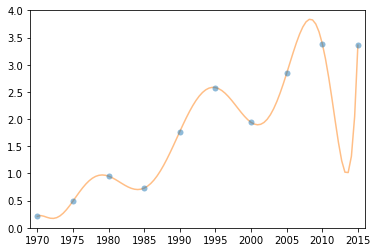

V2 estimate: [ 5.37207775  1.38106604  1.08051508  1.56176823  0.29026869  0.36826702
 -2.41386844 -1.23044256  1.07904307  3.64855973]


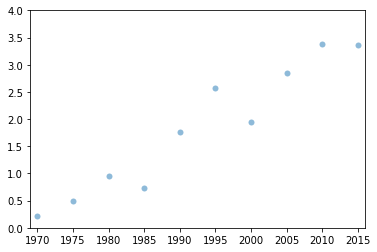

V3 estimate: [-1.48108153e+00  8.54904581e+01 -4.17416792e-02  6.79657316e-06
 -2.99802816e-10  5.86723727e-10 -1.39984335e-09 -4.85290705e-10
  3.05417829e-10 -1.25506566e-10]


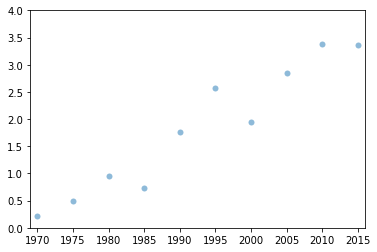

V4 estimate: [-1.48108153e+00  8.54904581e+01 -4.17416792e-02  6.79657317e-06
 -2.99804289e-10  5.86734191e-10 -1.39984621e-09 -4.85288275e-10
  3.05424542e-10 -1.25505227e-10]


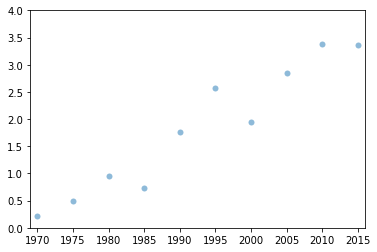

V5 estimate: [-1.08508980e-18  7.92400117e-15 -1.43316171e-11 -1.72358085e-08
  4.56148338e-05  9.10475626e-02 -1.35905472e+02 -4.51170979e+05
  9.88550241e+08 -5.37048069e+11]


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RankWarning: The fit may be poorly conditioned
  


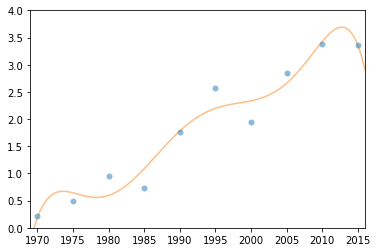

V6 estimate: [ 2.38420670e+00  3.68758336e+01 -1.51964142e+03 -2.48012545e+04
  6.65122895e+05  8.52078606e+06 -9.29588716e+07 -1.07028493e+09
  3.98663497e+09  4.33669999e+10]


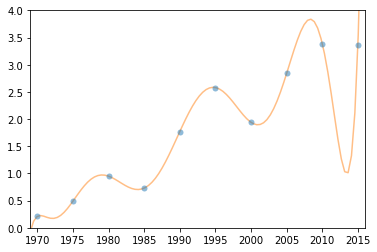

In [10]:
degree = 9
xModel, yModel = polyFitV1(xData, yData, degree)
plot_data_and_model(xData, yData, xModel, yModel)

xModel, yModel = polyFitV2(xData, yData, degree)
plot_data_and_model(xData, yData, xModel, yModel)

xModel, yModel = polyFitV3(xData, yData, degree)
plot_data_and_model(xData, yData, xModel, yModel)

xModel, yModel = polyFitV4(xData, yData, degree)
plot_data_and_model(xData, yData, xModel, yModel)

xModel, yModel = polyFitV5(xData, yData, degree)
plot_data_and_model(xData, yData, xModel, yModel)

xModel, yModel = polyFitV6(xData, yData, degree)
plot_data_and_model(xData, yData, xModel, yModel)

In der Numerik beschäftigt man sich mit der näherungsweisen Berechnung von Lösungen durch Apporximationsalgorithmen mit Hilfe von Computern. Somit gibt es einen klaren Unterschied zwischen theoretischer Mathematik mit Bleistift und Papier und praktischen Berechnungen digitaler Computer. Des Weiteren kommt es zu Rundungen bei sehr großen / kleinen Zahlen, da man nur endliche Zahlendarstellung im Computer hat. Gerade bei Zahlen nahe 0 sind Algorithmen oft nicht stabil, weil kleine Störungen der Daten große Auswirkungen haben können (z.B. 10^40 * 10^-17 >> 10^40 * 0).
polyFitV2 bis V4 scheinen nicht zu funktionieren, da es bei den Berechnungen zu numerischen Fehlern ko
mmt, was beispielsweise darauf zurückzuführen ist, dass Gleitkommazahlen manchmal gerundet werden müssen, um endlich dargestellt werden zu können. Somit ist die Mathematik nicht "kaputt", sondern es sind Fehler / Ungenauigkeiten bei der Berechnung aufgetreten, weshalb die Ergebnisse verzerrt werden.
polyFitV5 gibt eine RankWarning aus, was nach Dokumentation bedeutet, dass der Rang der Koeffizientenmatrix (unter Benutzung der LSM) nicht voll ist. "polyfit issues a RankWarning when the least-squares fit is badly conditioned. This implies that the best fit is not well-defined due to numerical error." (Quelle: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
polyFitV6 im Gegensatz zu polyFitV4 scheint zu funktionieren, da durch das Standardisieren extreme Wertunterschiede entfernt werden. So fallen später beim Rechnen nicht so einfach kleine Wertunterschiede weg.
Man sollte generell keinen Sachen blind vertrauen, irgendwelche Data Science libraries auf GitHub sind da keine Ausnahme, da man sich beispielsweise stets über numerische Fehler Gedanken machen sollte.